以下のパラメータでシミュレーションを実行して、hopG >= 2 の場合は、協力が進化しないことを確認する。hopG = 1 の場合については、hopG_1.ipynb で確認する。
```julia
# ../data/20220528_120031/*.csv
# simulation_pattern: 4500
trial_count = 20
agent_count = 10^3
generations = 10^3

network_type_list = [:scale_free_4, :regular_4, :random_4]
hop_game_list = [1, 2, 3, 4, 5]
hop_learning_list = [1, 2, 3, 4, 5]
b_list = [4.0, 5.0, 6.0]  # [4.0, 4.5, 5.0, 5.5, 6.0]
μ_list = [0.0, 0.01]  # [0.0, 0.01]
δ_list = [0.0625, 0.125, 0.25, 0.5, 1.0]  # [0.0625, 0.125, 0.25, 0.5, 1.0]
update_rule_list = [DB, IM]
```

In [1]:
import glob
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set(font_scale = 1.0, style = 'darkgrid')

In [2]:
COLUMNS = {
    'network_type': 'category',
    'hop_game': int,
    'hop_learning': int,
    'b': float,
    'μ': float,
    'δ': float,
    'update_rule': 'category',
    'trial': int,
    'step': int,
    'cooperator_rate': float
}
GROUPBY_COLUMNS = [c for c in COLUMNS if c not in ['trial', 'step', 'cooperator_rate']]

def load_df(csv_file_name: str) -> pd.DataFrame:
    _df = pd.read_csv(csv_file_name, header=None, names=COLUMNS.keys(), dtype=COLUMNS)
    return _df[_df.step >= 800].groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()

In [3]:
%%time
# Load
dir_name = '20220528_120031'
file_list = glob.glob('../../data/{}/*.csv'.format(dir_name))
print(len(file_list))

df_list = [load_df(file) for file in file_list]
df = pd.concat(df_list).groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()
df

20
CPU times: user 3.21 s, sys: 317 ms, total: 3.53 s
Wall time: 3.54 s


,network_type,hop_game,hop_learning,b,μ,δ,update_rule,cooperator_rate
0,random_4,1,1,4.0,0.00,0.0625,DB,0.000000
1,random_4,1,1,4.0,0.00,0.0625,IM,0.000000
2,random_4,1,1,4.0,0.00,0.1250,DB,0.000000
3,random_4,1,1,4.0,0.00,0.1250,IM,0.037233
4,random_4,1,1,4.0,0.00,0.2500,DB,0.000000
...,...,...,...,...,...,...,...,...
4495,scale_free_4,5,5,6.0,0.01,0.2500,IM,0.000000
4496,scale_free_4,5,5,6.0,0.01,0.5000,DB,0.000000
4497,scale_free_4,5,5,6.0,0.01,0.5000,IM,0.000000
4498,scale_free_4,5,5,6.0,0.01,1.0000,DB,0.000000


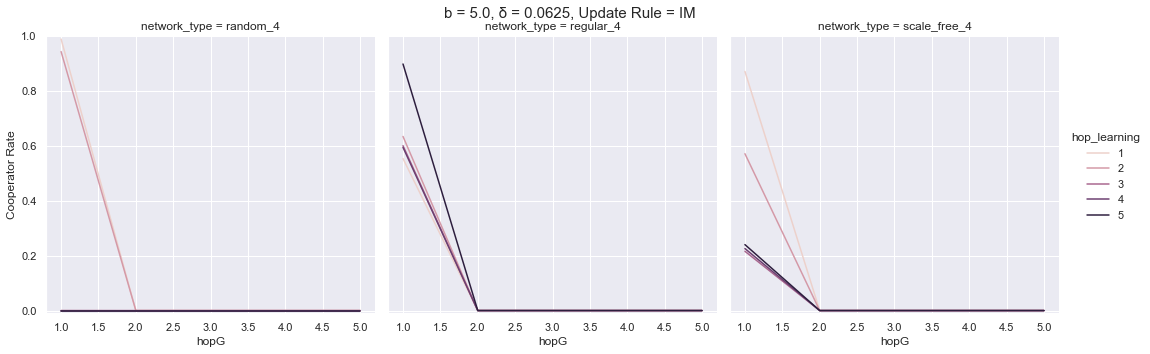

In [4]:
_df = df[(df.b == 5.0) & (df.μ == 0.01) & (df.δ == 0.0625) & (df.update_rule == 'IM')][[
    'network_type', 'hop_game', 'hop_learning', 'cooperator_rate'
]].reset_index(drop=True)
g = sns.relplot(kind='line', x='hop_game', y='cooperator_rate', hue='hop_learning', col='network_type', data=_df)
g.set_axis_labels('hopG', 'Cooperator Rate')
g.fig.suptitle('b = {}, δ = {}, Update Rule = {}'.format(5.0, 0.0625, 'IM'), size=15)
g.fig.subplots_adjust(top=.9)
g.set(ylim=(-0.01, 1))

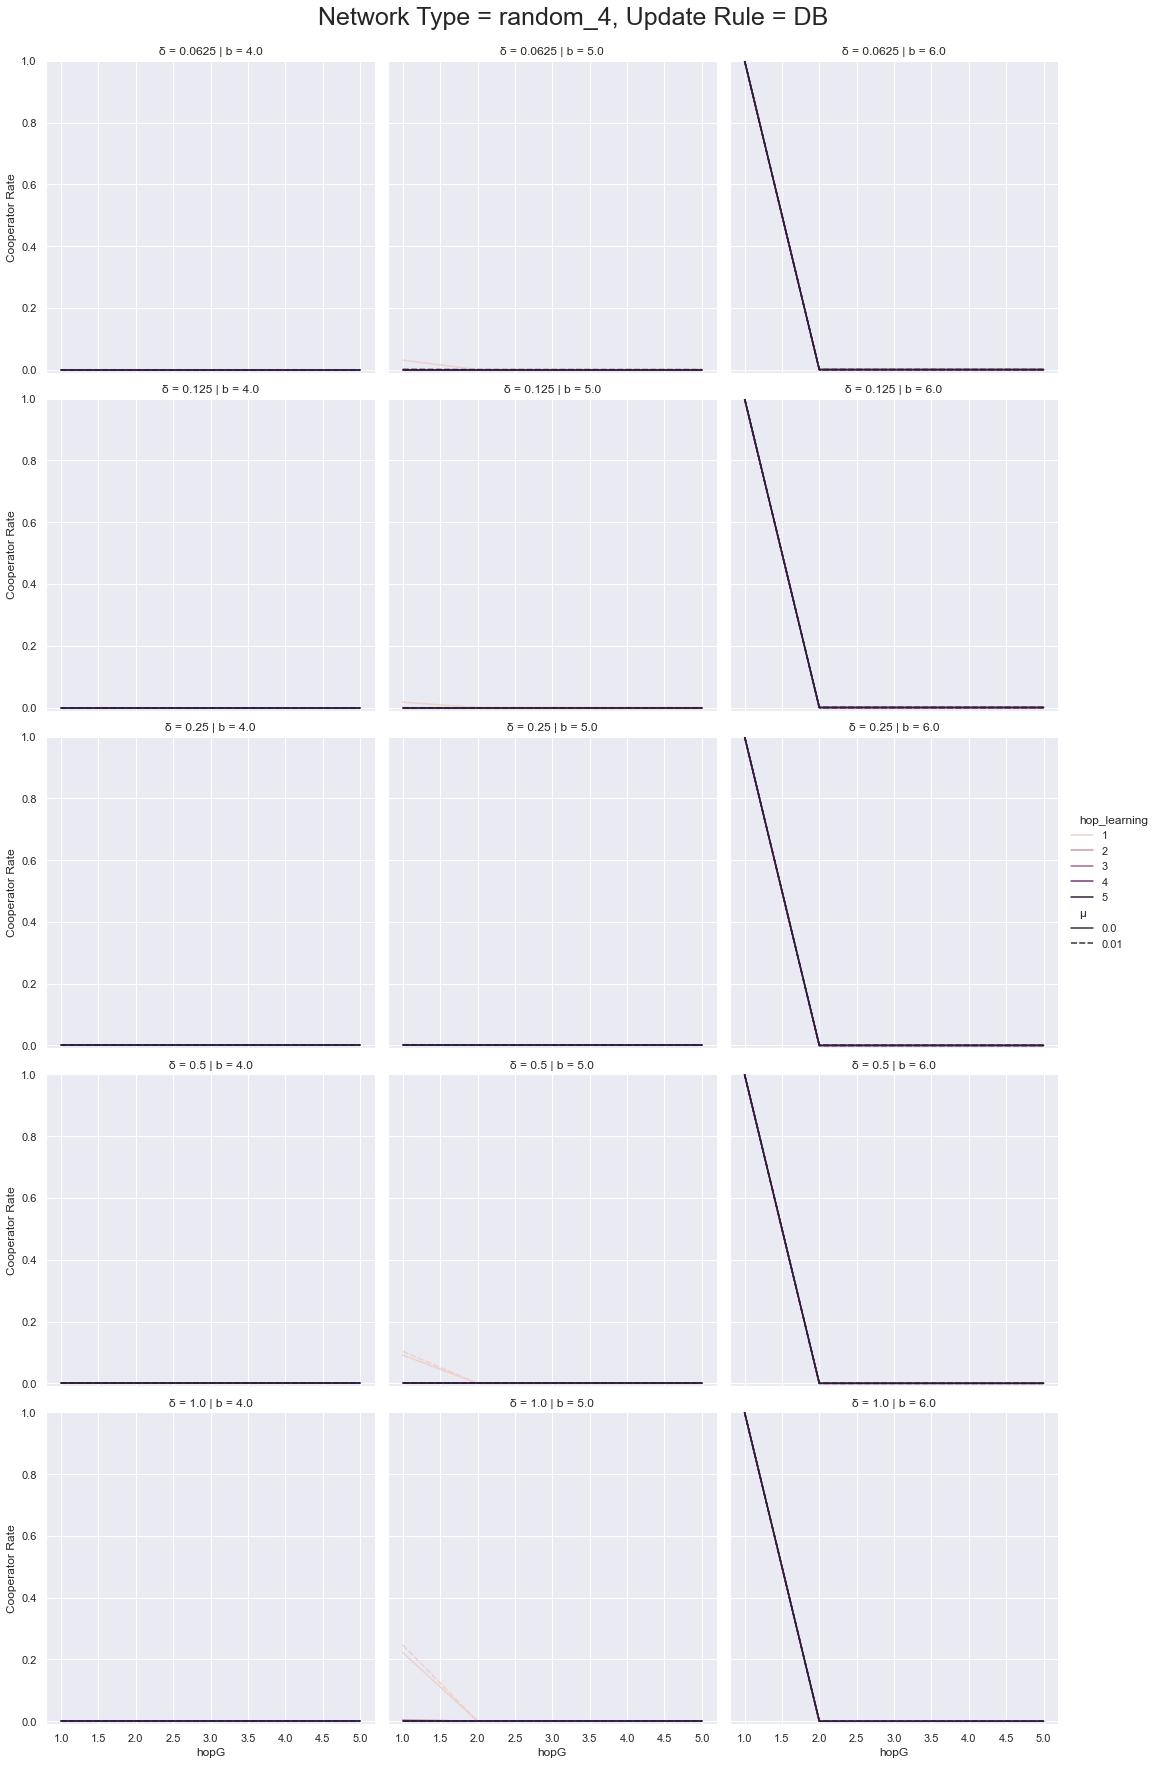

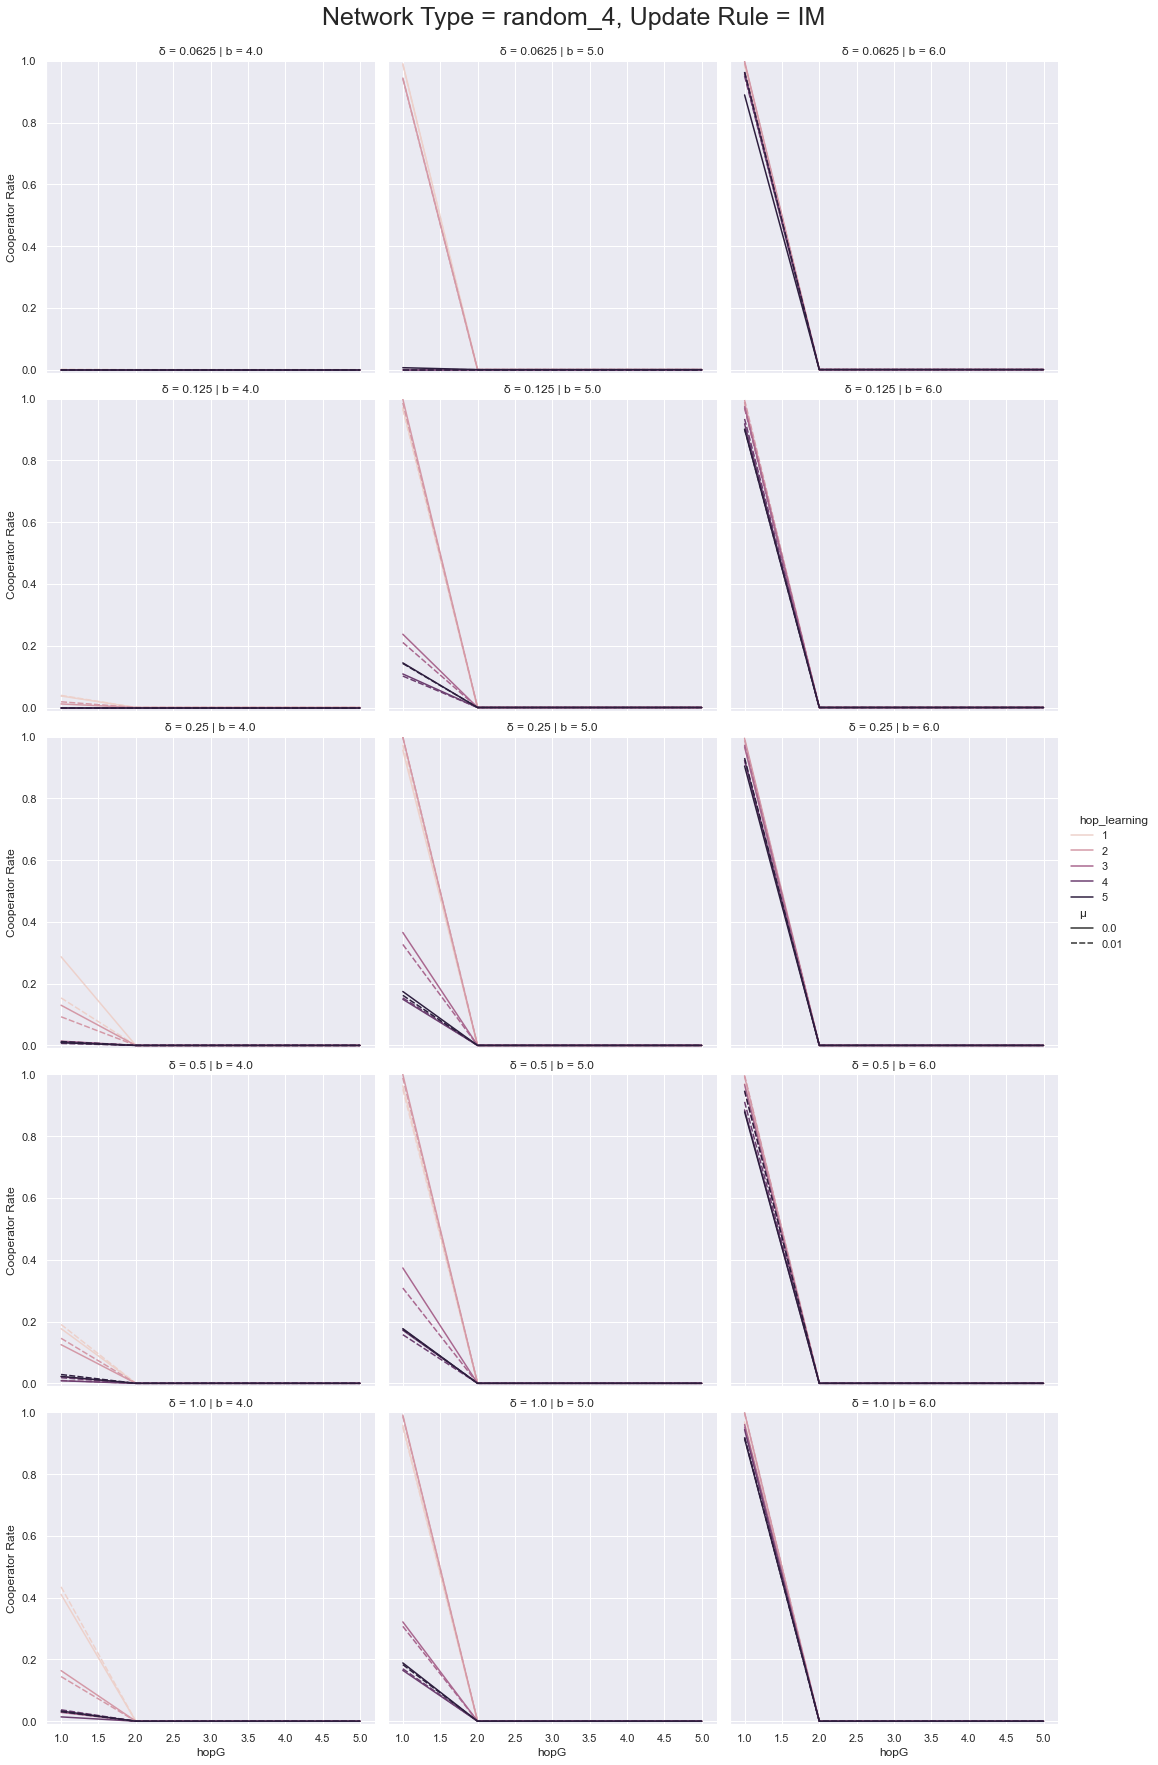

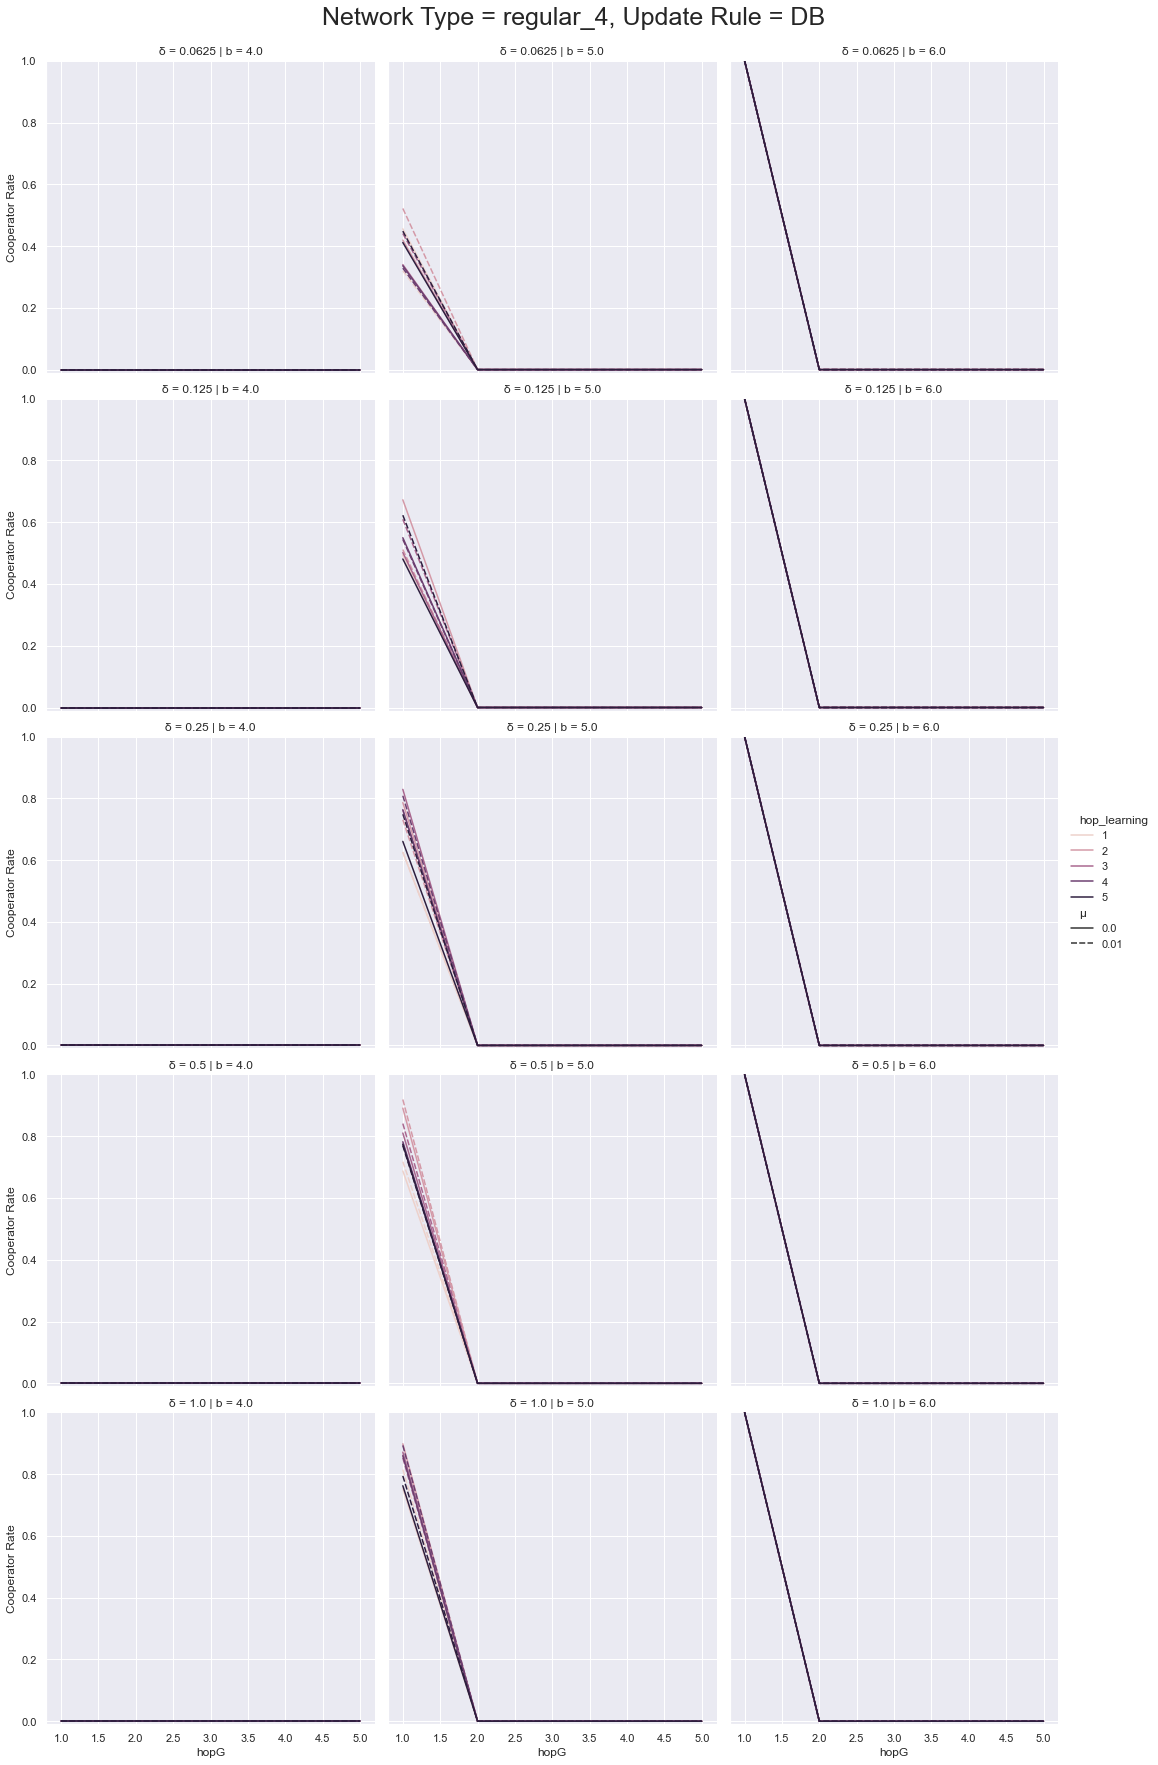

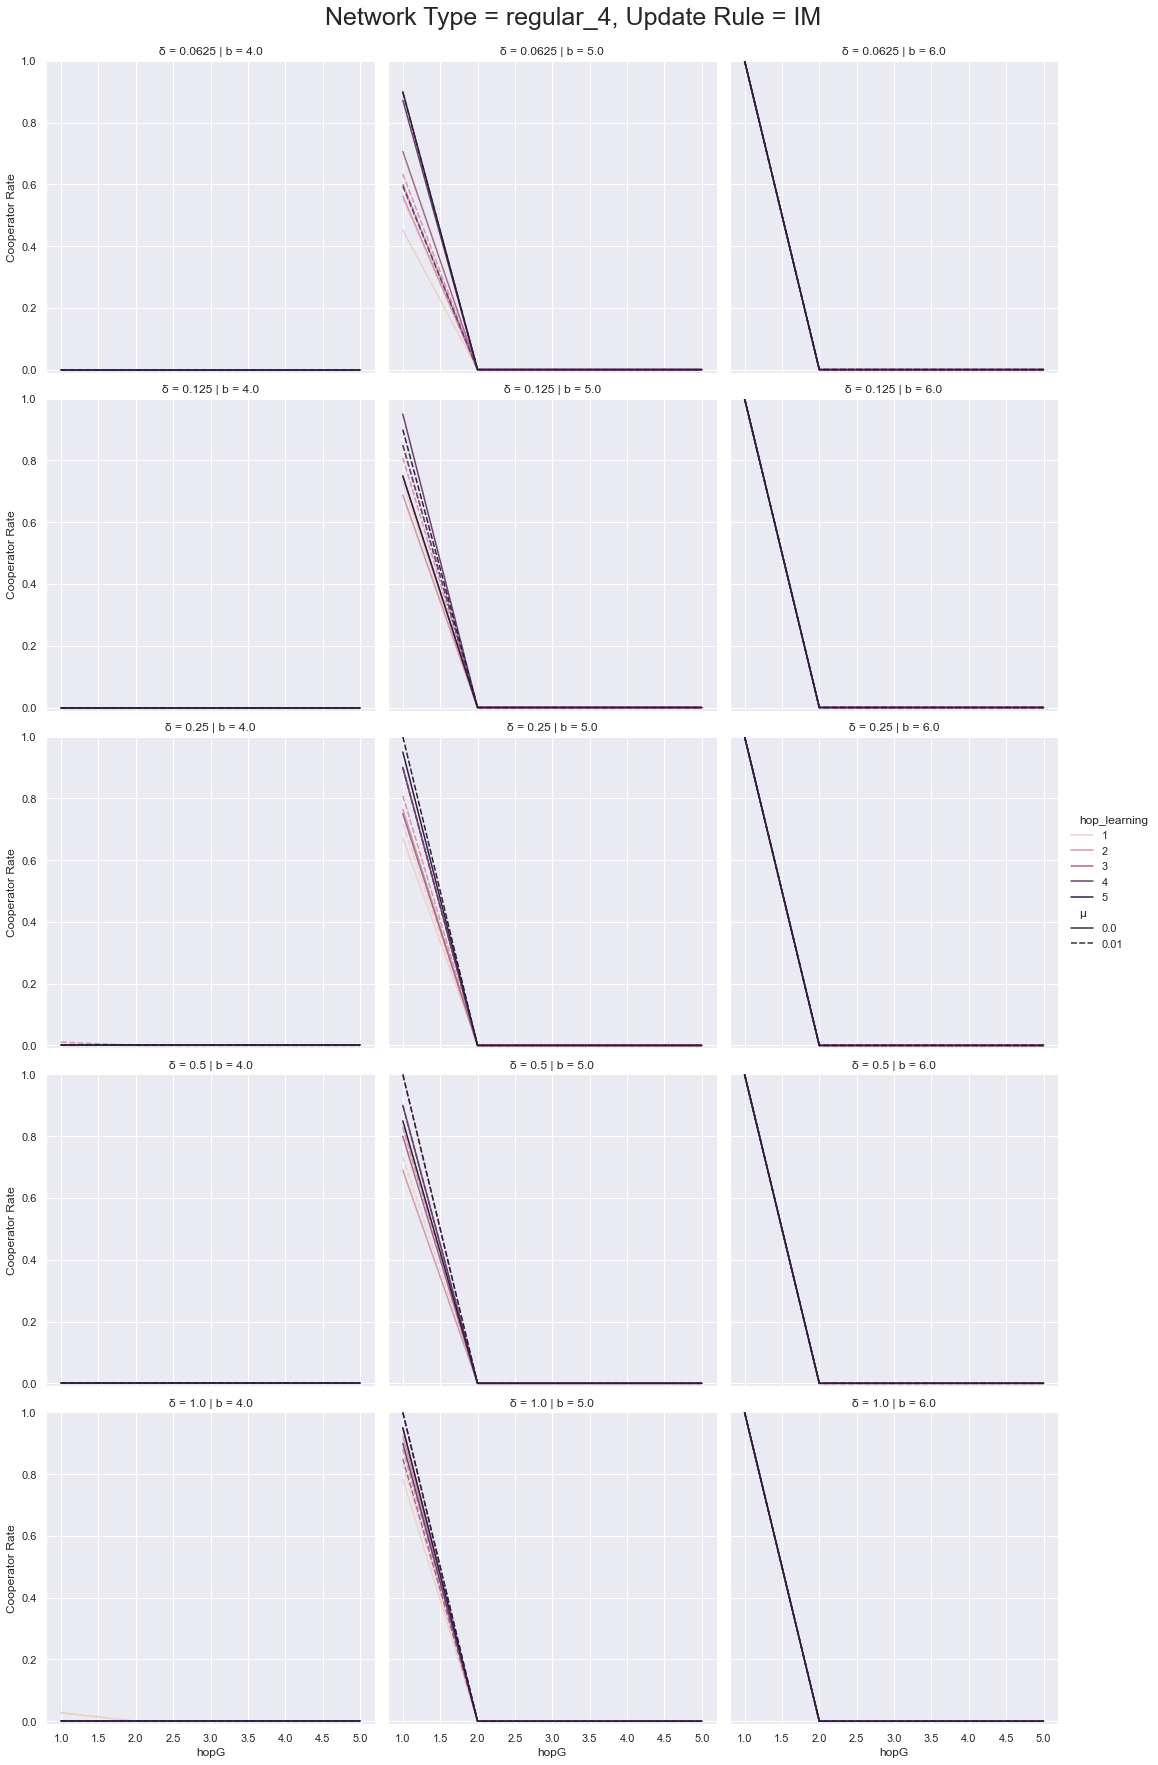

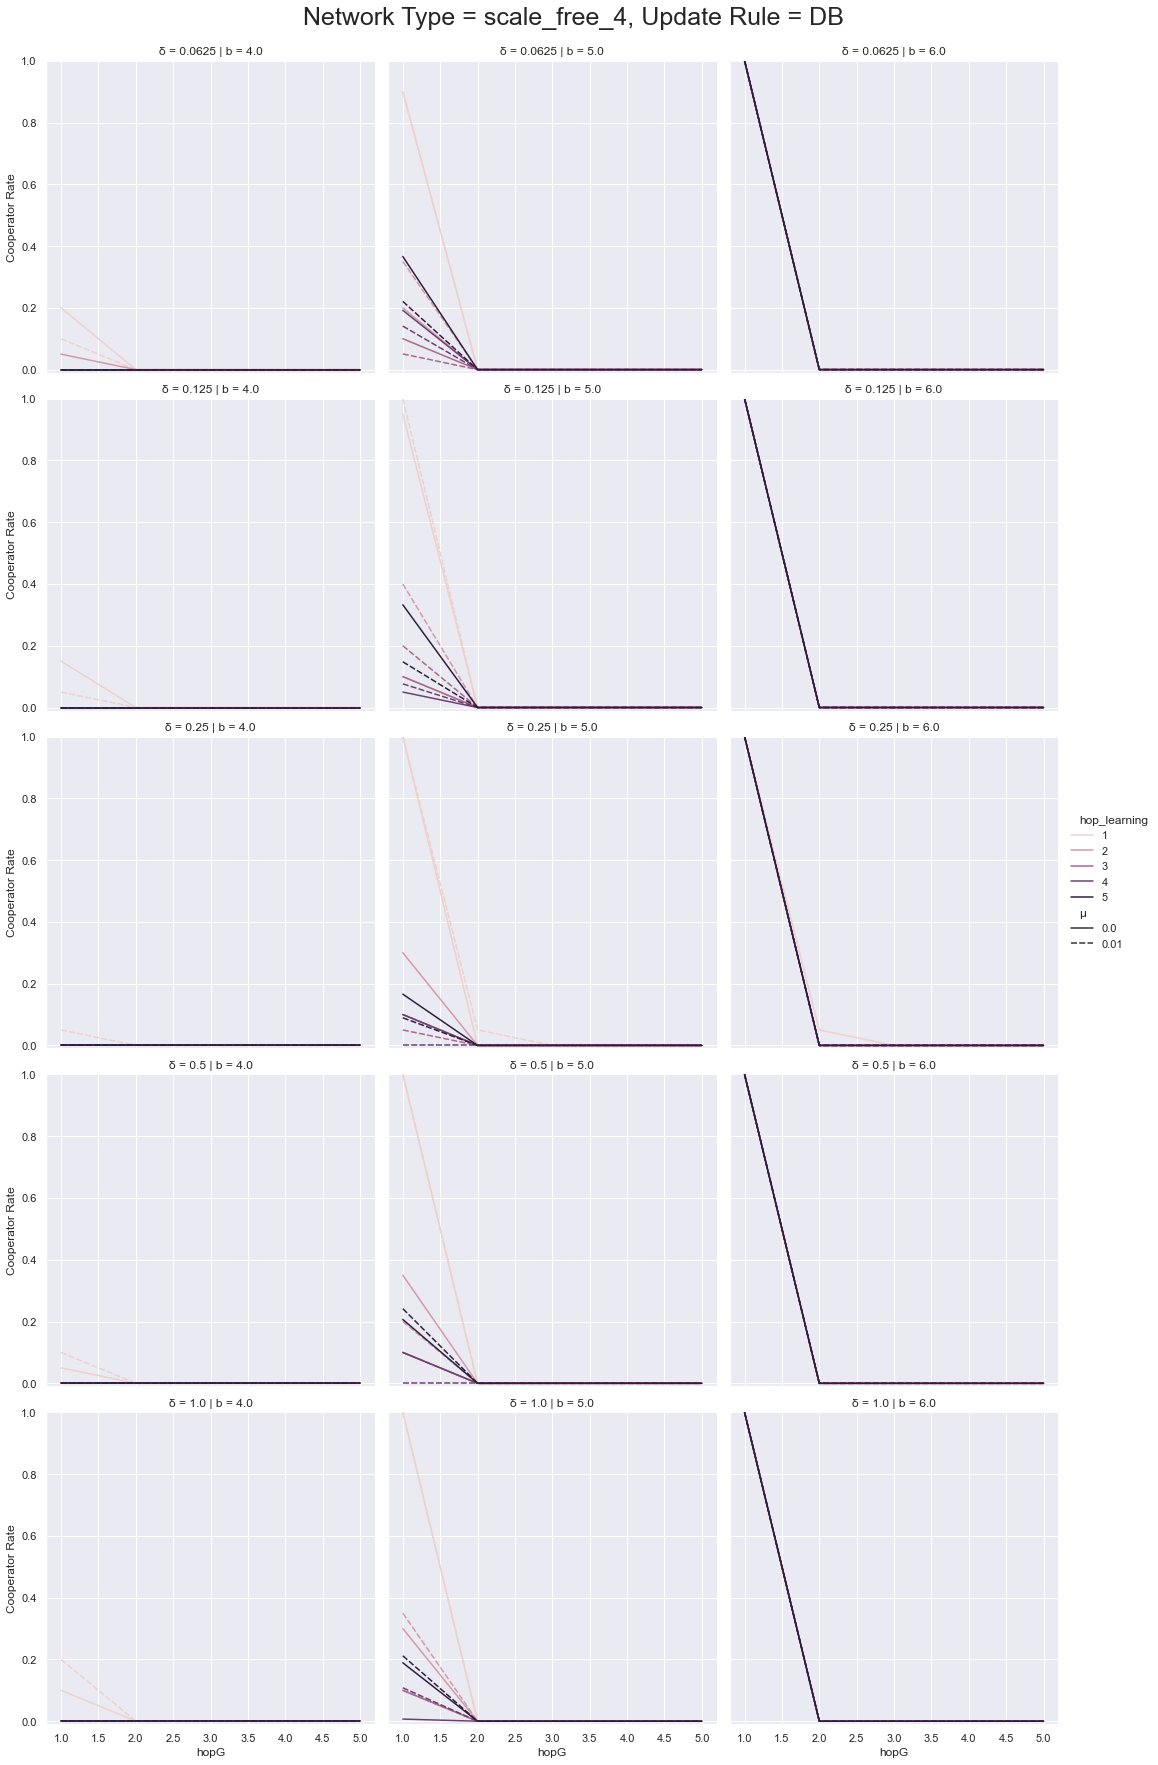

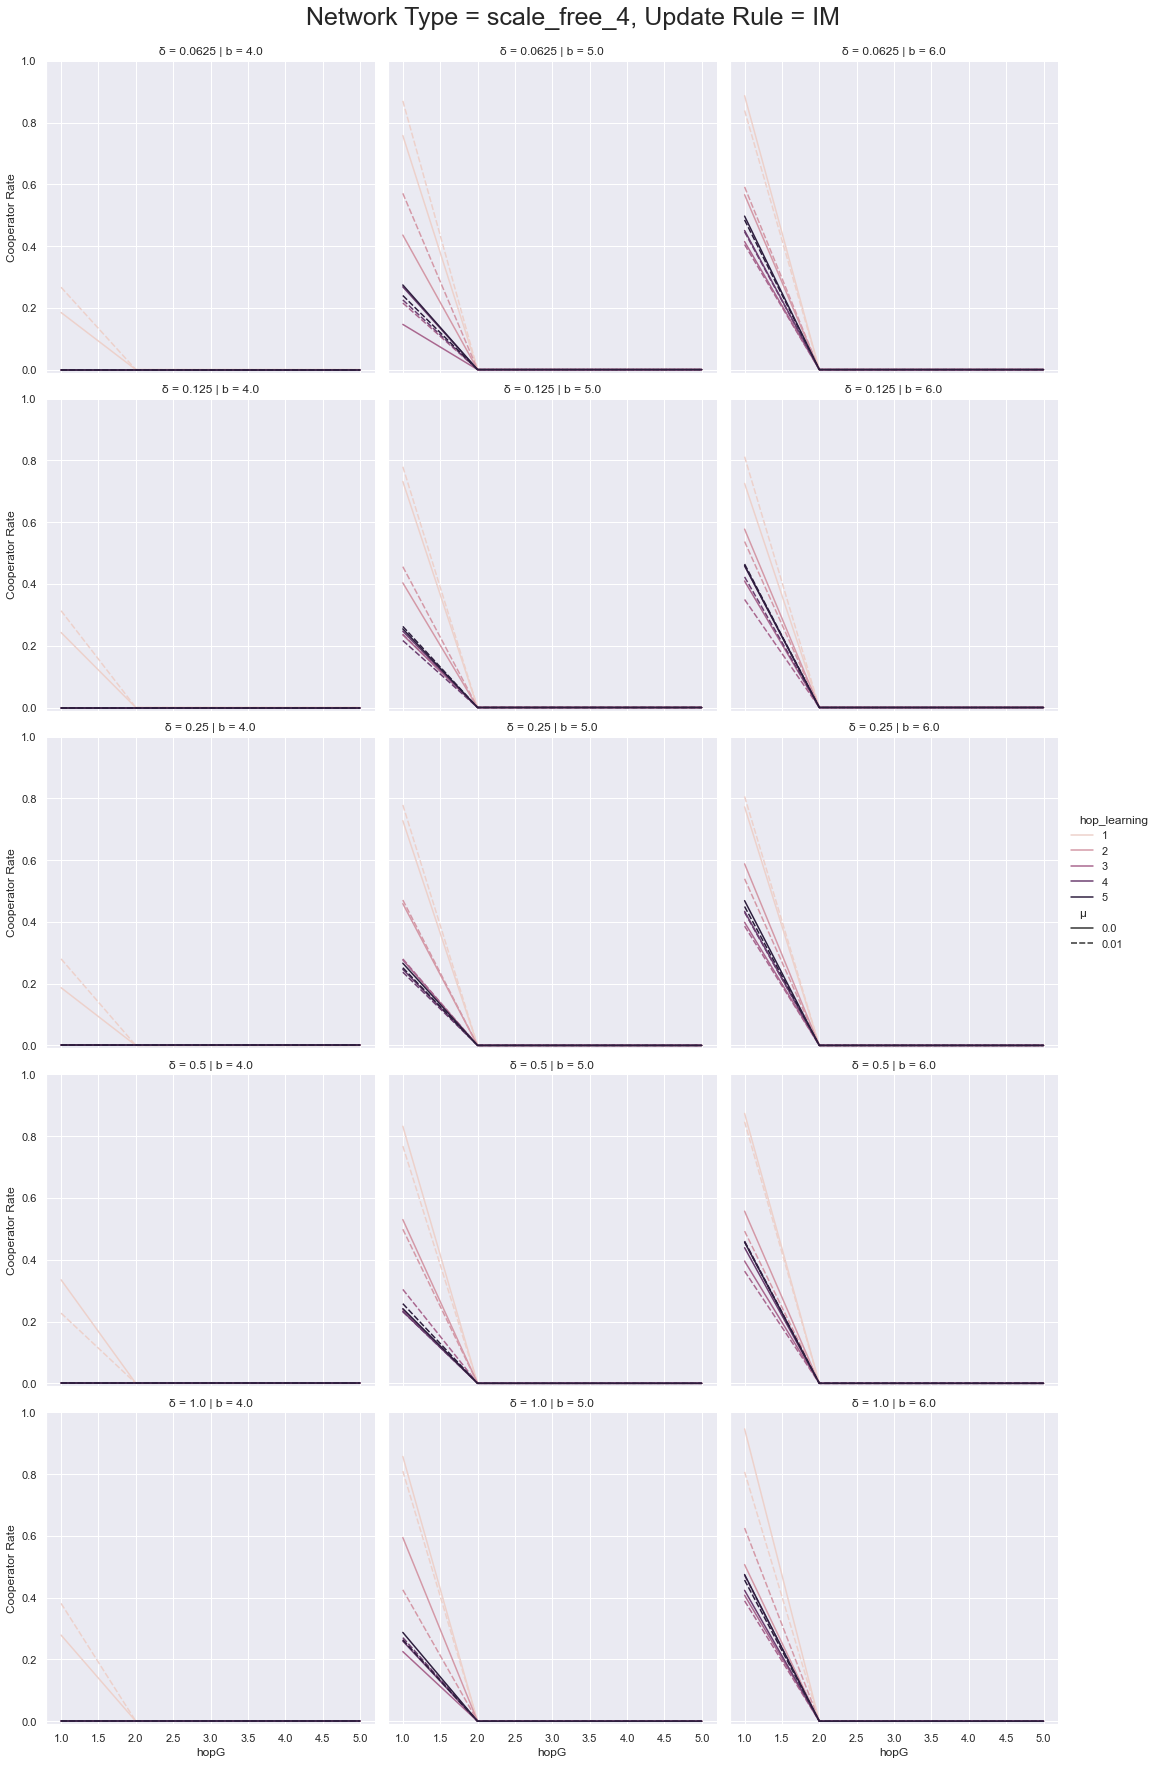

In [5]:
for (_, network_type, update_rule) in df[['network_type', 'update_rule']].drop_duplicates().itertuples():
    _df = df[(df.network_type == network_type) & (df.update_rule == update_rule)][[
        'hop_game', 'hop_learning', 'b', 'μ', 'δ', 'cooperator_rate'
    ]].reset_index(drop=True)
    g = sns.relplot(kind='line', x='hop_game', y='cooperator_rate', hue='hop_learning', style='μ', row='δ', col='b', data=_df)
    g.set_axis_labels('hopG', 'Cooperator Rate')
    g.fig.suptitle('Network Type = {}, Update Rule = {}'.format(network_type, update_rule), size=25)
    g.fig.subplots_adjust(top=.95)
    g.set(ylim=(-0.01, 1))